Toric Geometry in Sage
======================

Generalization of projective space, for example $\mathbb{P}^2$

In [258]:
P2.<x,y,z> = toric_varieties.P2()

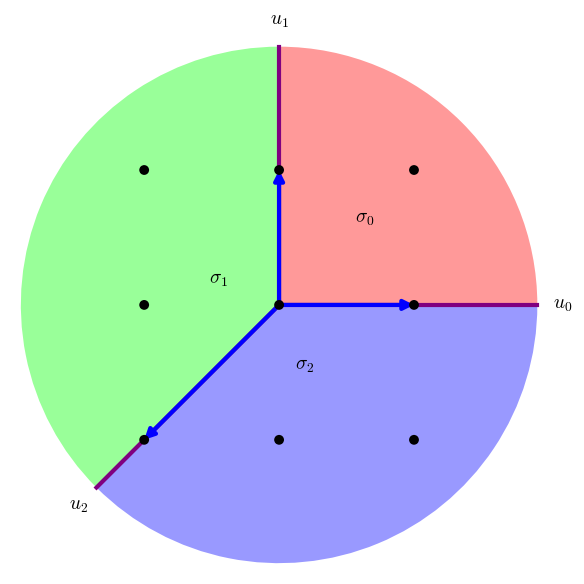

In [259]:
Sigma = P2.fan()
Sigma.plot()

Homogeneous coordinate ring
---------------------------

There is a homogeneous coordinate associated to each ray (1-d cone) of the fan, in this order:

In [260]:
P2.coordinate_ring()

Multivariate Polynomial Ring in x, y, z over Rational Field

In [261]:
Sigma(1)

(1-d cone of Rational polyhedral fan in 2-d lattice N,
 1-d cone of Rational polyhedral fan in 2-d lattice N,
 1-d cone of Rational polyhedral fan in 2-d lattice N)

Homogeneous rescalings are encoded in the linear relations between the rays

In [262]:
Sigma.rays()

N( 1,  0),
N( 0,  1),
N(-1, -1)
in 2-d lattice N

In [ ]:
u0, u1, u2 = Sigma.rays()
u0 + u1 + u2

This corresponds to the homogenous rescaling $[x:y:z] = [\lambda x: \lambda y:\lambda z]$ 

In [263]:
P2(2,2,2)

[2 : 2 : 2]

Points can be iterated over... lots of counting fun over finite fields can be had:

In [264]:
P2points = iter(P2.point_set())
[P2points.next() for i in range(10)]

[[0 : 1 : 1],
 [1 : 1 : 1],
 [-1 : 1 : 1],
 [1/2 : 1 : 1],
 [-1/2 : 1 : 1],
 [2 : 1 : 1],
 [-2 : 1 : 1],
 [1/3 : 1 : 1],
 [-1/3 : 1 : 1],
 [3 : 1 : 1]]

In [265]:
P2.change_ring(GF(5)).count_points()

31

In [267]:
P2.change_ring(GF(5)).point_set().list()

([0 : 0 : 1],
 [1 : 0 : 0],
 [0 : 1 : 0],
 [0 : 1 : 1],
 [0 : 1 : 2],
 [0 : 1 : 4],
 [0 : 1 : 3],
 [1 : 0 : 1],
 [1 : 0 : 2],
 [1 : 0 : 4],
 [1 : 0 : 3],
 [1 : 1 : 0],
 [1 : 2 : 0],
 [1 : 4 : 0],
 [1 : 3 : 0],
 [1 : 1 : 1],
 [1 : 2 : 1],
 [1 : 4 : 1],
 [1 : 3 : 1],
 [1 : 1 : 2],
 [1 : 2 : 2],
 [1 : 4 : 2],
 [1 : 3 : 2],
 [1 : 1 : 4],
 [1 : 2 : 4],
 [1 : 4 : 4],
 [1 : 3 : 4],
 [1 : 1 : 3],
 [1 : 2 : 3],
 [1 : 4 : 3],
 [1 : 3 : 3])

In [ ]:
Cone([(1,0), (0,1)])

Coordinate patches

In [268]:
patch = P2.affine_patch(0);  patch.fan().rays()

N(1, 0),
N(0, 1)
in 2-d lattice N

In [269]:
patch.embedding_morphism()

Scheme morphism:
  From: 2-d affine toric variety
  To:   2-d CPR-Fano toric variety covered by 3 affine patches
  Defn: Defined on coordinates by sending [x : y] to
        [x : y : 1]

Compactification
----------------

So far, we only talked about the open $\mathbb{C}^n$; The higher-dimensional cones determine the compactification: Homogeneous coordinates can vanish simultaneously if and only if they span a cone of the fan. The forbidden set is

In [270]:
P2.Stanley_Reisner_ideal()

Ideal (x*y*z) of Multivariate Polynomial Ring in x, y, z over Rational Field

Singularities
-------------

Interesting varieties are usually not smooth:

In [271]:
P2.is_smooth()

True

In [272]:
A2Z2.<x,y> = toric_varieties.A2_Z2()

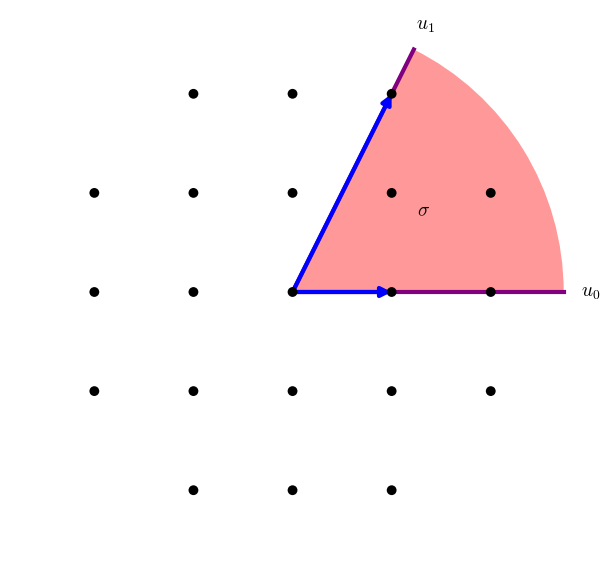

In [273]:
Sigma = A2Z2.fan()
Sigma.plot()

In [274]:
cone2 = Sigma(2)[0]
cone2.is_smooth()

False

In [275]:
A2Z2.is_smooth()

False

I lied a bit in the definition of the homogenous rescalings; Really its rescaling by $Hom(A_1, \mathbb{C}^\times)$:

In [276]:
AA = A2Z2.Chow_group()
AA.degree(1)

C2

In [277]:
AA.gens()

((| 1 mod 2 | 0 ), (| 0 mod 2 | 1 ))

In [278]:
AA.relations()

Free module of degree 4 and rank 3 over Integer Ring
Echelon basis matrix:
[0 1 1 0]
[0 0 2 0]
[0 0 0 1]

Singularity comes from the rays of the cone not spanning the lattice

In [279]:
cone2.span().index_in_saturation()

2

Resolution of singularities
---------------------------

Toric geometry is functor from fans & fan morphisms to toric varieties & toric morphisms

In [280]:
Sigma = Fan(cones=[[0, 1]], rays=[(1, 0), (0, 1)])
SigmaPrime = Sigma.subdivide(new_rays=[(1,1)])

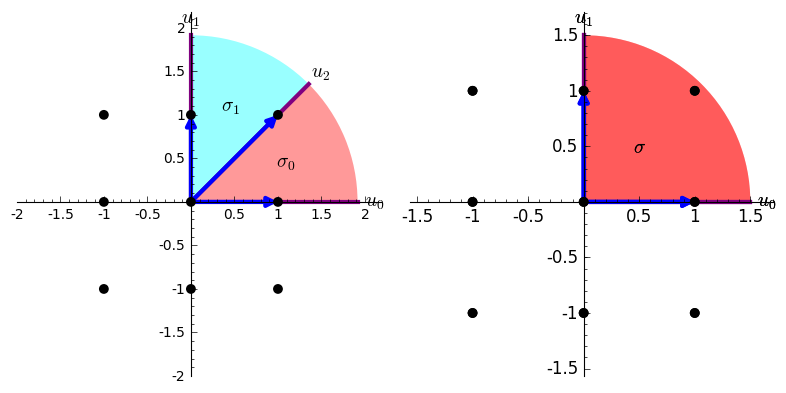

In [281]:
graphics_array([SigmaPrime.plot(), Sigma.plot()])

In [282]:
fm = FanMorphism(
    identity_matrix(2), 
    domain_fan=SigmaPrime, 
    codomain=Sigma
);  fm

Fan morphism defined by the matrix
[1 0]
[0 1]
Domain fan: Rational polyhedral fan in 2-d lattice N
Codomain fan: Rational polyhedral fan in 2-d lattice N

In [283]:
X = ToricVariety(Sigma)
Xprime = ToricVariety(SigmaPrime)
f = Xprime.hom(fm, X)

In [284]:
f

Scheme morphism:
  From: 2-d toric variety covered by 2 affine patches
  To:   2-d affine toric variety
  Defn: Defined by sending Rational polyhedral fan in 2-d lattice N to Rational polyhedral fan in 2-d lattice N.

In [285]:
f.as_polynomial_map()

Scheme morphism:
  From: 2-d toric variety covered by 2 affine patches
  To:   2-d affine toric variety
  Defn: Defined on coordinates by sending [z0 : z1 : z2] to
        [z0*z2 : z1*z2]

Subdivision is not unique; Different subdivisions are different resolutions 

In [286]:
toric_varieties.Conifold(
).fan().subdivide(make_simplicial=True).plot()

Graphics3d Object

Subschemes
----------

Homogeneoeus equations define subschemes

In [288]:
P2.<x,y,z> = toric_varieties.P2()
E = P2.subscheme(x^3+y^3+z^3)
E

Closed subscheme of 2-d CPR-Fano toric variety covered by 3 affine patches defined by:
  x^3 + y^3 + z^3

In [289]:
E.affine_patch(0)

Closed subscheme of 2-d affine toric variety defined by:
  x^3 + y^3 + 1

In [290]:
E.is_smooth()

True

In [291]:
E.change_ring(GF(5)).point_set()

Set of rational points of Closed subscheme of 2-d CPR-Fano toric variety covered by 3 affine patches defined by:
  x^3 + y^3 + z^3

In [292]:
list(_)

[[0 : 1 : 4], [1 : 0 : 4], [1 : 4 : 0], [1 : 2 : 1], [1 : 1 : 2], [1 : 3 : 3]]

Relation with polytopes
-----------------------

A lattice polytope containing the origin defines two rational polyhedral fans

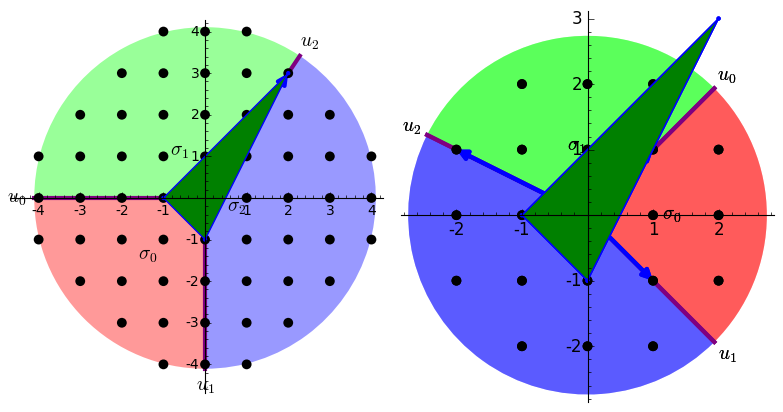

In [293]:
triangle = Polyhedron([(-1, 0), (0, -1), (2,3)])
graphics_array([
        triangle.plot() + FaceFan(triangle).plot(), 
        triangle.plot() + NormalFan(triangle).plot()
])

In [294]:
square_pyramid = Polyhedron([(0,0,0), (0,0,1), (1,0,1), (0,1,1), (1,1,1)])
square_pyramid.plot()

Graphics3d Object

In [295]:
pc = PointConfiguration(square_pyramid.vertices())
list(pc.triangulations())

[(<0,1,2,3>, <0,2,3,4>), (<0,1,2,4>, <0,1,3,4>)]

Cohomology Ring
---------------

The homogeneous coordinates $z_i$ define divisors $V(z_i) = \{z_i=0\}$

In [296]:
P2.<x,y,z> = toric_varieties.P2()
P2.divisor(x), P2.divisor(y), P2.divisor(z)

(V(x), V(y), V(z))

In [297]:
D = P2.divisor(x) + P2.divisor(y);  D

V(x) + V(y)

In [298]:
D.parent()

Group of toric ZZ-Weil divisors on 2-d CPR-Fano toric variety covered by 3 affine patches

In [299]:
D.is_Cartier()

True

The divisors $V(x)$ and $V(y)$ are different but can be moved to each other

In [300]:
P2.rational_class_group()(D), D.cohomology_class(), D.Chow_cycle()

(Divisor class [2], [2*z], ( 0 | 2 | 0 ))

In [301]:
P2.cohomology_basis()

(([1],), ([z],), ([z^2],))

In [302]:
P2.Chern_class(), P2.Todd_class()

([3*z^2 + 3*z + 1], [z^2 + 3/2*z + 1])

In [303]:
P2.integrate(P2.Chern_class())   # Euler number

3

In [304]:
P2.integrate(P2.Chern_character() * P2.Todd_class())    # Index of the tangent bundle

8

Torus equivariant bundles
-------------------------

Defining data for Klyachko bundles
* Vector space over big torus orbit $(\mathbb{C}^\times)^n$
* Gluing data at the $z_i=0$ divisors: graded filtration for each ray $\rho_i$

In [305]:
TP2 = P2.sheaves.tangent_bundle()

In [306]:
TP2.fiber()     # Vector space over big torus

Vector space of dimension 2 over Rational Field

In [307]:
TP2.get_filtration()    # graded filtration for each ray

Filtrations
    N(-1, -1): QQ^2 >= QQ^1 >= 0
      N(0, 1): QQ^2 >= QQ^1 >= 0
      N(1, 0): QQ^2 >= QQ^1 >= 0

In [308]:
TP2.get_filtration((0,1)).get_degree(1)

Vector space of degree 2 and dimension 1 over Rational Field
Basis matrix:
[0 1]

In [310]:
TP2.random_deformation().get_filtration((0,1)).get_degree(1)

Vector space of degree 2 and dimension 1 over Rational Field
Basis matrix:
[  1 3/8]

Graded semiring structure for graded multi-filtrations is semiring of torus-quivariant sheaves

In [311]:
D = P2.divisor(x)
P2.sheaves.line_bundle(D)

Rank 1 bundle on 2-d CPR-Fano toric variety covered by 3 affine patches.

In [312]:
V = TP2.wedge(2) + P2.sheaves.line_bundle(-D) * TP2;  V

Rank 3 bundle on 2-d CPR-Fano toric variety covered by 3 affine patches.

In [313]:
V.cohomology(weight=(0,0), dim=True)

(2, 0, 0)

In [314]:
TP2.cohomology(weight=(0,0), dim=True)

(2, 0, 0)